In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import utils
%load_ext autoreload
%autoreload 2

In [2]:
from utils.corner2d_new import (
    CornerZ12, CornerZSpectral,
    plot_hist2d, plot_square_minus_circle_noedge,
    plot_theories_z12, plot_theories_zspectral,
    annotate_theories_z12, annotate_theories_zspectral,
    get_lines_for_legend, select_by_keys
)

def plot_z12(
            post, post_inset=None, zmax_inset=1.,
            ppe_grid_indices=[], ppe_grid_angles=[], 
            ppe_result_cis=[], ppe_annotation_anchors=0.,
            fig=None, inset_bounds=[0.6,0.05,0.35,0.35]):
    cp = CornerZ12(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    cp.plot(post['z_1'].values, post['z_2'].values, color='C0')
#     cp.mark(0., 0., color='black',
#             marker='s', markersize=2.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            None, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            None, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    cp.add_shade(color='lightgray', zorder=2)
    cp.set_xlim(-1., 1.)
    cp.set_ylim(-1., 1.)
    cp.set_yticks(cp.axes[2].get_xticks())
    
    if post_inset is not None:
        axins = cp.axes[2].inset_axes(inset_bounds)
        plot_hist2d(
                post_inset['z_1'].values, post_inset['z_2'].values, 
                ax=axins, color='C0')
#         axins.axvline(0., color='black')
#         axins.axhline(0., color='black')
#         axins.plot(
#                 0., 0., color='black',
#                 marker='s', markersize=2.*plt.rcParams['lines.markersize'])
        plot_theories_z12(
                ppe_grid_angles, 
                ax=axins, color='gray', linestyle='dotted', zorder=1)
        plot_theories_z12(
                ppe_grid_angles, ppe_result_cis, 
                ax=axins, color='C1', linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
        plot_square_minus_circle_noedge(
                ax=axins, width=zmax_inset*4, ratio=0.5, color='lightgray', zorder=2)
        axins.set_xlim(-zmax_inset, zmax_inset)
        axins.set_ylim(-zmax_inset, zmax_inset)
        axins.set_xticks([-zmax_inset, 0., zmax_inset])
        axins.set_yticks([])
        axins.tick_params(direction='in', labelsize=0.75*plt.rcParams['xtick.labelsize'])
        cp.axes[2].indicate_inset_zoom(axins, edgecolor="black")
    return cp


def plot_zspectral(
            post, post_inset=None, zmax_inset=1.,
            ppe_grid_indices=[], ppe_grid_angles=[], 
            ppe_result_cis=[], ppe_annotation_anchors=0.,
            fig=None, inset_bounds=[0.6,0.05,0.35,0.35]):
    cp = CornerZSpectral(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    cp.plot(post['z_ang'].values, post['z_bilat'].values, color='C0')
#     cp.mark(y=0., color='black')
    cp.add_ppe_results(
            None, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            None, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    cp.axes[2].axhline(0., color='gray', linestyle='dotted')
    cp.axes[3].axhline(0., color='gray', linestyle='dotted')
    cp.set_xlim(0., np.pi)
    cp.set_ylim(-1., 1.)
    
    if post_inset is not None:
        axins = cp.axes[2].inset_axes(inset_bounds)
        plot_hist2d(
                post_inset['z_ang'].values, post_inset['z_bilat'].values, 
                ax=axins, color='C0')
#         axins.axhline(0., color='black')
        plot_theories_zspectral(
                ppe_grid_angles, 
                ax=axins, color='gray', linestyle='dotted', zorder=1)
        plot_theories_zspectral(
                ppe_grid_angles, ppe_result_cis, 
                ax=axins, color='C1', linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
        axins.axhline(0., color='gray', linestyle='dotted')
        axins.set_xlim(0., np.pi)
        axins.set_ylim(-zmax_inset, zmax_inset)
        axins.set_yticks([-zmax_inset, 0., zmax_inset])
        axins.set_xticks([])
        axins.tick_params(direction='in', labelsize=0.75*plt.rcParams['ytick.labelsize'])
        cp.axes[2].indicate_inset_zoom(axins, edgecolor="black")
    return cp

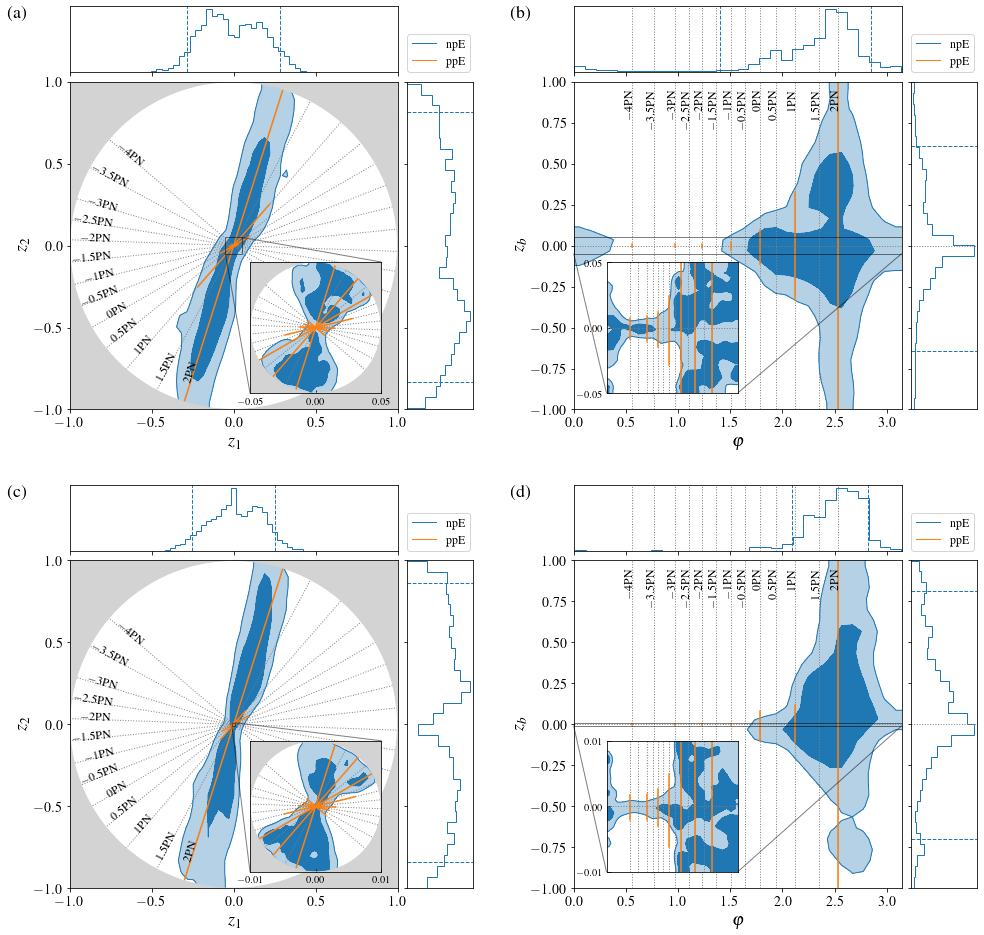

In [5]:
root_constraints = "../data/"
root_posteriors = "../data/bilby_results/posteriors/"

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*2,
        utils.TEXT_WIDTH_PRD_DOUBLE*2))
subfigs = fig.subfigures(2, 2)

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])

# ======================================

run_base = "mtot35"
ppe_constraints_file = f"gr_ppe_constraints_latent_{run_base}.csv"
ppe_constraints_file = os.path.join(root_constraints, ppe_constraints_file)
ppe_constraints = pd.read_csv(ppe_constraints_file, index_col=0)

run_method = "gr_z12"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post = pd.read_csv(posterior_file, index_col=0)
run_method = "gr_z12_zmax0p05"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post_inset = pd.read_csv(posterior_file, index_col=0)
cp = plot_z12(
        post, post_inset, zmax_inset=0.05,
        ppe_grid_indices=ppe_constraints['b'].values,
        ppe_grid_angles=ppe_constraints['z_theta'].values,
        ppe_result_cis=ppe_constraints[['z_bilat_90ci_left', 'z_bilat_90ci_right']].values,
        ppe_annotation_anchors=0.75, 
        fig=subfigs[0,0], inset_bounds=[0.55,0.05,0.4,0.4]
)
# cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[1].legend(lines, labels, loc=(0,0))

run_method = "gr_zpolar"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post = pd.read_csv(posterior_file, index_col=0)
run_method = "gr_zpolar_zmax0p05"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post_inset = pd.read_csv(posterior_file, index_col=0)
cp = plot_zspectral(
        post, post_inset, zmax_inset=0.05,
        ppe_grid_indices=ppe_constraints['b'].values,
        ppe_grid_angles=ppe_constraints['z_ang'].values,
        ppe_result_cis=ppe_constraints[['z_bilat_90ci_left', 'z_bilat_90ci_right']].values,
        ppe_annotation_anchors=0.95, 
        fig=subfigs[0,1], inset_bounds=[0.1,0.05,0.4,0.4]
)
# cp.axes[2].legend(lines, labels, loc=(0.02,0.7))
cp.axes[1].legend(lines, labels, loc=(0,0))


# ======================================

run_base = "mtot15"
ppe_constraints_file = f"gr_ppe_constraints_latent_{run_base}.csv"
ppe_constraints_file = os.path.join(root_constraints, ppe_constraints_file)
ppe_constraints = pd.read_csv(ppe_constraints_file, index_col=0)

run_method = "gr_z12"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post = pd.read_csv(posterior_file, index_col=0)
run_method = "gr_z12_zmax0p01"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post_inset = pd.read_csv(posterior_file, index_col=0)
cp = plot_z12(
        post, post_inset, zmax_inset=0.01,
        ppe_grid_indices=ppe_constraints['b'].values,
        ppe_grid_angles=ppe_constraints['z_theta'].values,
        ppe_result_cis=ppe_constraints[['z_bilat_90ci_left', 'z_bilat_90ci_right']].values,
        ppe_annotation_anchors=0.75, 
        fig=subfigs[1,0], inset_bounds=[0.55,0.05,0.4,0.4]
)
# cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[1].legend(lines, labels, loc=(0,0))

run_method = "gr_zpolar"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post = pd.read_csv(posterior_file, index_col=0)
run_method = "gr_zpolar_zmax0p01"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post_inset = pd.read_csv(posterior_file, index_col=0)

cp = plot_zspectral(
        post, post_inset, zmax_inset=0.01,
        ppe_grid_indices=ppe_constraints['b'].values,
        ppe_grid_angles=ppe_constraints['z_ang'].values,
        ppe_result_cis=ppe_constraints[['z_bilat_90ci_left', 'z_bilat_90ci_right']].values,
        ppe_annotation_anchors=0.95, 
        fig=subfigs[1,1], inset_bounds=[0.1,0.05,0.4,0.4]
)
# cp.axes[2].legend(lines, labels, loc=(0.02,0.7))
cp.axes[1].legend(lines, labels, loc=(0,0))


# ======================================

subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
subfigs[1, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

axes_to_label = [sf.axes[0] for sf in subfigs.flat]
axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')

# fig.savefig('../figs/constrain_gr.pdf')

## For presentation

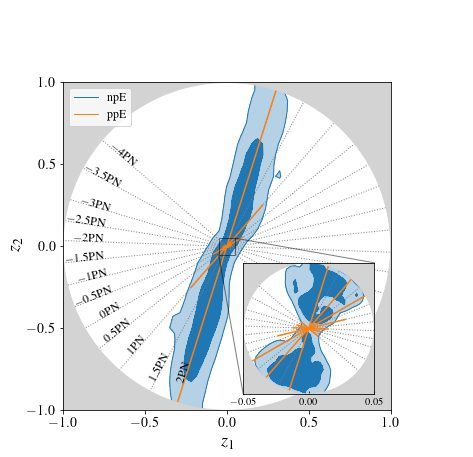

In [7]:
root_constraints = "../data/"
root_posteriors = "../data/bilby_results/posteriors/"

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

# ======================================

run_base = "mtot35"
ppe_constraints_file = f"gr_ppe_constraints_latent_{run_base}.csv"
ppe_constraints_file = os.path.join(root_constraints, ppe_constraints_file)
ppe_constraints = pd.read_csv(ppe_constraints_file, index_col=0)

run_method = "gr_z12"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post = pd.read_csv(posterior_file, index_col=0)
run_method = "gr_z12_zmax0p05"
posterior_file = run_base + "_" + run_method + ".csv"
posterior_file = os.path.join(root_posteriors, posterior_file)
post_inset = pd.read_csv(posterior_file, index_col=0)
cp = plot_z12(
        post, 
        ppe_grid_indices=ppe_constraints['b'].values,
        ppe_grid_angles=ppe_constraints['z_theta'].values, ppe_annotation_anchors=0.75, 
        fig=fig, 
        ppe_result_cis=ppe_constraints[['z_bilat_90ci_left', 'z_bilat_90ci_right']].values,
        post_inset=post_inset, zmax_inset=0.05,
        inset_bounds=[0.55,0.05,0.4,0.4],
)
# labels = ['NPE']
# lines = get_lines_for_legend(colors=['C0'])
labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])
cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[0].set_visible(False)
cp.axes[3].set_visible(False)

# ======================================

fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
# fig.savefig('../figs/constrain_gr_mtot35_z12_presentation.pdf')